# Lesson 3.2 数据生成器与Python模块编写

在有了相关性理论基础之后，我们即可创建一个可用于回归模型实验的数据生成器。

In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 画图模块
import matplotlib as mpl
import matplotlib.pyplot as plt


## 一、自定义数据生成器

为了方便后续练习的展开，我们尝试自己创建一个数据生成器，用于自主生成一些符合某些条件，难度可控，具备某些特性的数据集。机器学习发展至今，在追求模型效果提升的过程中，模型本身可解释性逐渐变弱，对于很多集成类算法，很多模型构建思路也在朝向深度学习靠拢。这使得很多模型内部逐渐呈现灰箱甚至是黑箱的状态。但是，在初学过程中，我们仍然需要通过类似控制变量得方法，通过设计一些实验，去深入理解算法运行原理及一些优化方法的实际作用，这就需要我们自己动手，创建一些数据用于实验的原材料，通过一些实验深入了解模型原理，从炼丹师朝着化学家更进一步。

> 和Lesson 1中介绍的一样，课程中案例分为三类，分别是基础阶段的手动创建数据集，实战阶段的竞赛数据集和企业应用实战阶段的企业数据集。

### 1. 手动生成数据

我们先尝试生成两个特征，存在偏差，自变量和因变量存在线性关系的数据集

In [2]:
num_inputs = 2  # 输入特征数
num_examples = 1000  # 样本数

然后尝试通过线性方程，确定自变量和因变量的真实关系

In [3]:
np.random.seed(24)      # 设置随机种子，使每次生成的数据相同
np.random.randn(2, 2)

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039]])

In [4]:
# 线性方程系数
w_true = np.array([2, -1]).reshape(-1, 1)
b_true = np.array(1)

# 扰动项
delta = 0.01

# 生成数据
features = np.random.randn(num_examples, num_inputs)
labels_true = np.dot(features, w_true) + b_true
labels = labels_true + np.random.normal(0, size=labels_true.shape) * delta   

注意，此时labels_true和features满足严格意义上的线性方程关系

$$
y = 2x_{1} - x_{2} + 1
$$

但我们实际使用的标签labels，则是在labels_true的基础上增添了一个扰动项，np.random.normal(size = labels_true.shape) * delta，这其实也符合我们一般获取数据的情况：真实客观世界或许存在某个规律，但我们搜集到的数据往往会因为各种原因存在一定的误差，无法完全描述真实世界的客观规律，这其实也是模型误差的来源之一（另一个误差来源是模型本身捕获规律的能力）。这其中，$y = 2x_{1} - x_{2} + 1$相当于我们从上帝视角创建的数据真实服从规律，而扰动项，则相当于认为创造的获取数据时的误差。

In [5]:
features[: 10]

array([[-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       [ 0.6788048 ,  1.88927273],
       [ 0.9615384 ,  0.1040112 ],
       [-0.48116532,  0.85022853],
       [ 1.45342467,  1.05773744],
       [ 0.16556161,  0.51501838],
       [-1.33693569,  0.56286114],
       [ 1.39285483, -0.06332798]])

In [6]:
labels[: 10]

array([[ 0.29161817],
       [ 1.83851813],
       [-2.46058022],
       [ 0.44394438],
       [ 2.8133944 ],
       [-0.8109745 ],
       [ 2.85143778],
       [ 0.83156296],
       [-2.22624102],
       [ 3.84279053]])

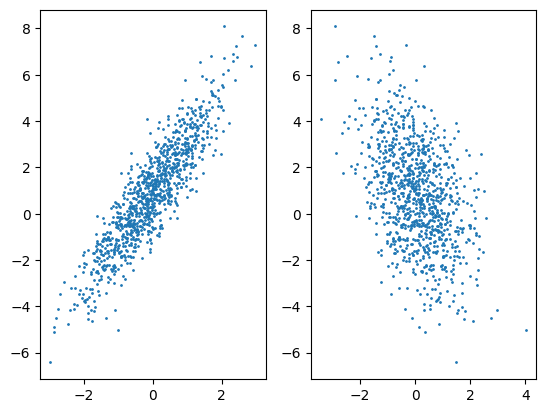

In [7]:
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], labels, 1)      # 第一个特征和标签的关系
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1], labels, 1)      # 第二个特征和标签的关系

不难看出，两个特征和标签都存在一定的线性关系，并且跟特征的系数绝对值有很大关系。当然，若要增加线性模型的建模难度，可以增加扰动项的数值比例，从而削弱线性关系。

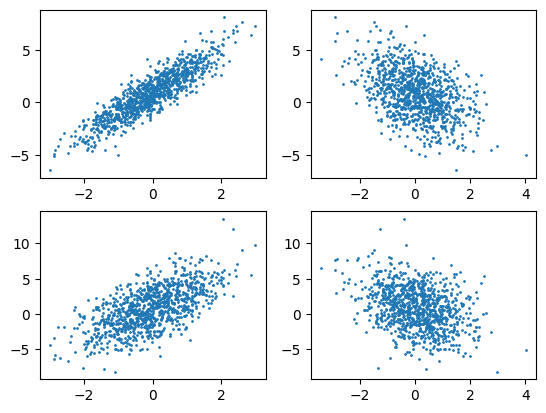

In [8]:
# 设置随机数种子
np.random.seed(24)

# 修改因变量
labels1 = labels_true + np.random.normal(0, size=labels_true.shape) * 2

# 可视化展示
plt.subplot(2, 2, 1)
plt.scatter(features[:, 0], labels, 1)      # 第一个特征和标签的关系
plt.subplot(2, 2, 2)
plt.scatter(features[:, 1], labels, 1)      # 第二个特征和标签的关系

# 扰动较大的情况
plt.subplot(2, 2, 3)
plt.scatter(features[:, 0], labels1, 1)      # 第一个特征和标签的关系
plt.subplot(2, 2, 4)
plt.scatter(features[:, 1], labels1, 1)      # 第二个特征和标签的关系

当然，我们也能生成非线性关系的数据集，此处我们创建满足 $y = 2x^{2} + 1$规律的数据集。

In [9]:
np.power([2, 3], 2)

array([4, 9], dtype=int32)

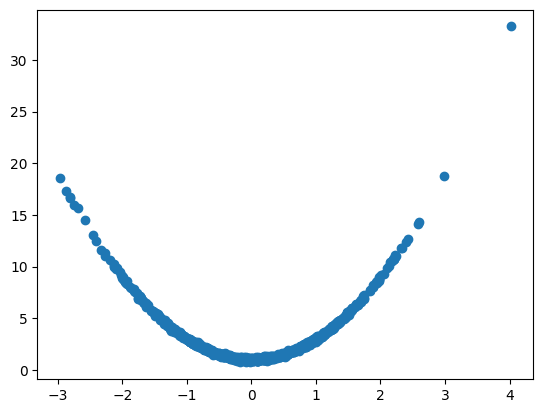

In [10]:
# 设置随机数种子
np.random.seed(24)

num_inputs = 1  # 输入特征数
num_examples = 1000  # 样本数

# 线性方程系数
w_true = np.array([2])
b_true = np.array(1)

# 特征和标签取值
features = np.random.randn(num_examples, num_inputs)
labels_true = np.power(features, 2) * w_true + b_true
labels = labels_true + np.random.normal(0, size=labels_true.shape) * 0.1

# 可视化展示
plt.scatter(features, labels)

> 关于曲线相关，其实也可将其转化为线性相关，例如上例中，我们只需新增一列$x^{2} = x_{1}$即可构建一个线性模型，该方法也是特征工程中的一种特征衍生的方法。

此时需要注意的是，无论是创建了曲线规律的数据集，还是增加了扰动项绝对值，都会对建模造成困难。但二者的造成困难的方式是不同的。如果是曲线规律的数据集，则代表规律本身更加复杂，此时需要使用更加复杂的模型来进行规律提取，该部分属于模型选取和参数调优的技术内容；而如果是扰动项比较大，则代表规律被掩盖的比较深，此时需要采用其他技术手段进行白噪声的处理，该部分属于特征工程技术内容。但本节内，无论是曲线规律还是白噪声数值过大，都会对线性方程建模造成困难。

> 这就是控制数据集建模难度的最基础的抓手。

### 2. 创建生成回归类数据的函数

为了方便后续使用，我们将上述过程封装在一个函数内

* 定义创建函数

In [11]:
A = np.arange(4).reshape(2, 2)
A

array([[0, 1],
       [2, 3]])

In [12]:
np.power( A, 3)

array([[ 0,  1],
       [ 8, 27]], dtype=int32)

In [13]:
A.dot(2)

array([[0, 2],
       [4, 6]])

In [19]:
def arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1):
    """回归类数据集创建函数
    :param num_examples: 样本数
    :param w: 线性方程系数
    :param bias: 是否有偏置项
    :param delta: 扰动项
    :param deg: 多项式的次数
    :return: 特征和标签
    """

    if bias:
        num_inputs = len(w) - 1
        features_true = np.random.randn(num_examples, num_inputs) # 特征
        w_true = np.array(w[:-1]).reshape(-1, 1) # 线性方程系数
        b_true = np.array(w[-1])
        labels_true = np.dot(np.power(features_true, deg), w_true) + b_true    # 严格满足人造规律的标签
        features = np.concatenate((features_true, np.ones((num_examples, 1))), axis=1)      # 加上全为1的一列之后的特征
    else:
        num_inputs = len(w)
        features_true = np.random.randn(num_examples, num_inputs) # 特征个数
        w_true = np.array(w).reshape(-1, 1)
        labels_true = np.dot(np.power(features_true, deg), w_true)
        features = features_true
    
    labels = labels_true + np.random.normal(0, size=labels_true.shape) * delta   # 扰动项
    return features, labels


> 注：上述函数默认创建的是一个满足$y = 2x_{1} - x_{2} + 1$的数据集。

* 测试函数性能

首先查看扰动项较小的时候的数据情况

In [22]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)

features[: 10]

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       [ 0.56441685,  0.29572189,  1.        ],
       [-1.62640423,  0.2195652 ,  1.        ],
       [ 0.6788048 ,  1.88927273,  1.        ],
       [ 0.9615384 ,  0.1040112 ,  1.        ],
       [-0.48116532,  0.85022853,  1.        ],
       [ 1.45342467,  1.05773744,  1.        ],
       [ 0.16556161,  0.51501838,  1.        ]])

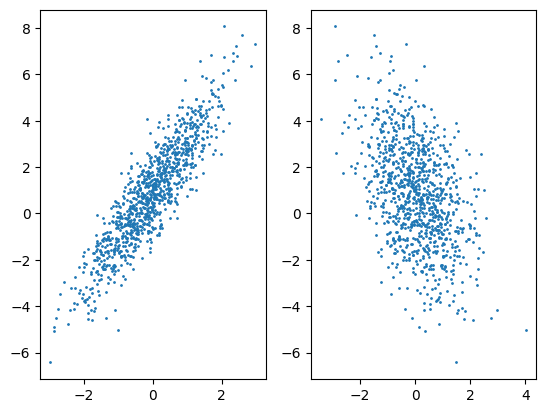

In [23]:
# 绘制图像查看结果
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], labels, 1)      # 第一个特征和标签的关系
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1], labels, 1)      # 第二个特征和标签的关系


然后查看扰动项较大时数据情况

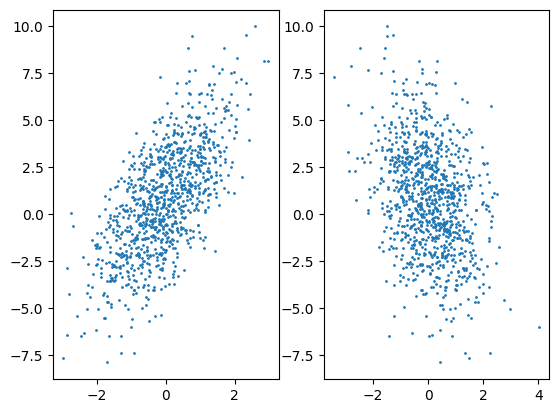

In [24]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为2
features, labels = arrayGenReg(delta=2)

# 绘制图像查看结果
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], labels, 1)      # 第一个特征和标签的关系
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1], labels, 1)      # 第二个特征和标签的关系


当特征和标签满足二阶线性关系时，数据表现

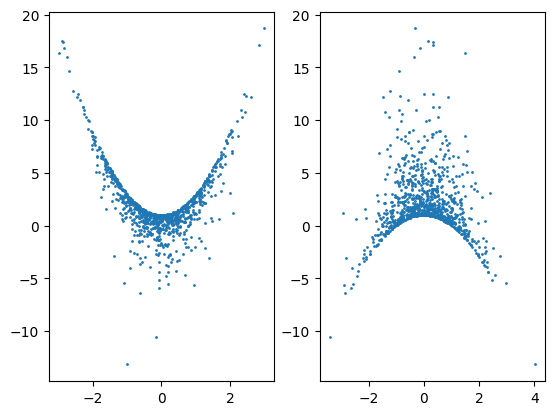

In [25]:
# 设置随机数种子
np.random.seed(24)

# 最高次数为2
features, labels = arrayGenReg(deg=2)

# 绘制图像查看结果
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], labels, 1)      # 第一个特征和标签的关系
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1], labels, 1)      # 第二个特征和标签的关系


在定义好数据创建函数之后，即可开始尝试手动实现线性回归模型。

> 该数据生成器并非为线性回归模型量身定制，而是通用于此后我们学习的所有回归类模型，关于分类模型数据集的创建，我们将在介绍逻辑回归时讲解。

> 此外，对于机器学习模型，我们将更多的从数据规律和模型提取规律角度出发，并不会太多顾虑模型可解释性等问题。上述数据本身也是从规律角度出发构建的数据，并不具备“解释性”。